[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for TCS.NS...
Successfully fetched data for TCS.NS.
Fetching data for INFY.NS...
Successfully fetched data for INFY.NS.

Aligned DataFrame:
                 TCS.NS      INFY.NS
Date                                
2023-01-02  3261.449951  1524.000000
2023-01-03  3311.350098  1522.550049
2023-01-04  3314.649902  1494.800049
2023-01-05  3311.100098  1475.199951
2023-01-06  3211.550049  1448.500000


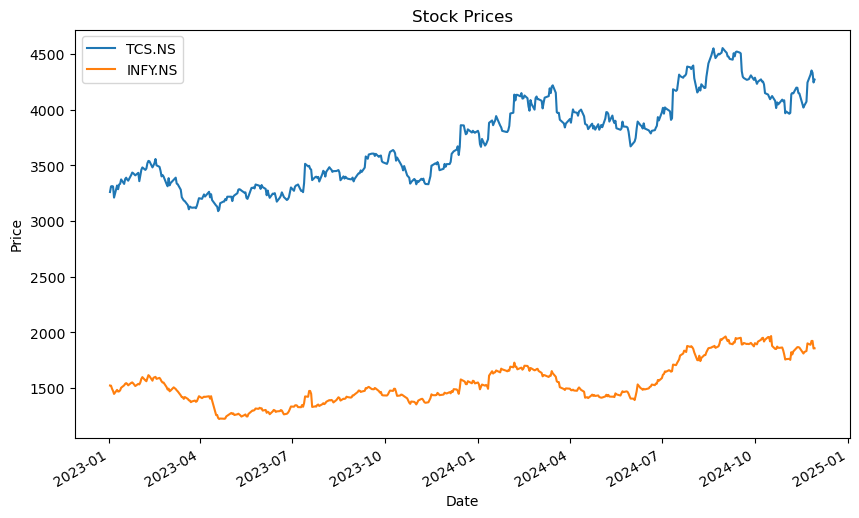


Testing Stationarity for TCS.NS

ADF Test:
ADF Statistic: -1.1723565908813667
p-value: 0.6853727628829612
Critical Values:
	1%: -3.444370153876086
	5%: -2.867722323562515
	10%: -2.5700629410213627

KPSS Test:
KPSS Statistic: 3.2045290882180444
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
TCS.NS is Non-Stationary.


Testing Stationarity for INFY.NS

ADF Test:
ADF Statistic: -0.7766780925489135
p-value: 0.8258769022461525
Critical Values:
	1%: -3.444370153876086
	5%: -2.867722323562515
	10%: -2.5700629410213627

KPSS Test:
KPSS Statistic: 2.2693189270973213
p-value: 0.01
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
INFY.NS is Non-Stationary.



C:\Users\ps123\AppData\Local\Temp\ipykernel_5340\1270337699.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")
C:\Users\ps123\AppData\Local\Temp\ipykernel_5340\1270337699.py:53: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c', nlags="auto")


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import yfinance as yf

# Stock Symbols and Dates
stocks = ['TCS.NS', 'INFY.NS']
start_date = "2023-01-01"
end_date = "2024-12-01"

# Download Stock Data
data = {}
for stock in stocks:
    print(f"Fetching data for {stock}...")
    stock_data = yf.download(stock, start=start_date, end=end_date)
    if not stock_data.empty:
        data[stock] = stock_data['Close']
        print(f"Successfully fetched data for {stock}.")
    else:
        print(f"No data available for {stock}.")

# Combine data into a DataFrame
if data:
    # Align indices
    df = pd.concat(data.values(), axis=1, keys=data.keys()).dropna()
    df.columns = data.keys()
else:
    raise ValueError("No valid stock data retrieved.")

# Debugging Output
print("\nAligned DataFrame:")
print(df.head())

# Plot the Time Series
df.plot(figsize=(10, 6))
plt.title("Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(stocks)
plt.show()

# Stationarity Test Functions
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    return result[1]  # p-value

def kpss_test(series):
    result = kpss(series, regression='c', nlags="auto")
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[3].items():
        print(f"\t{key}: {value}")
    return result[1]  # p-value

# Apply ADF and KPSS Tests
for stock in df.columns:
    print(f"\nTesting Stationarity for {stock}")
    print("\nADF Test:")
    adf_p = adf_test(df[stock].dropna())
    print("\nKPSS Test:")
    kpss_p = kpss_test(df[stock].dropna())

    if adf_p > 0.05 and kpss_p < 0.05:
        print(f"{stock} is Non-Stationary.\n")
    else:
        print(f"{stock} is Stationary.\n")
